In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
import numpy as np

In [2]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

In [3]:
train_directory = 'Downloads/animal_class/train'
test_directory = 'Downloads/animal_class/test'

In [4]:
train_dataset = image_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    subset="training",
    seed=42,
    batch_size=32,
    class_mode='categorical' 
)

val_dataset = image_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    subset="validation",
    seed=42,
    batch_size=32,
    class_mode='categorical'  
test_dataset = image_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    subset="validation",
    seed=42,
    batch_size=32,
)

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.
Found 145 images belonging to 1 classes.


In [5]:
class_labels = [entry for entry in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, entry))]


print("Class Labels:")
for label in class_labels:
    label_path = os.path.join(train_directory, label)
    num_contents = len(os.listdir(label_path))
    print(f"{label}: {num_contents} items")


Class Labels:
cat: 700 items
deer: 600 items
dog: 900 items
horse: 600 items


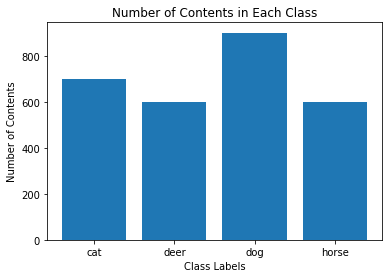

In [6]:

class_labels = [entry for entry in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, entry))]


num_contents = [len(os.listdir(os.path.join(train_directory, label))) for label in class_labels]


plt.bar(class_labels, num_contents)
plt.xlabel('Class Labels')
plt.ylabel('Number of Contents')
plt.title('Number of Contents in Each Class')
plt.show()


In [7]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
mobilenet = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                              include_top = False,
                                              weights = 'imagenet'
)


In [8]:
mobilenet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [9]:
mobilenet.trainable = False

In [10]:
model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1280, activation = 'relu'))
model.add(Dense(640, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1280)              1639680   
_________________________________________________________________
dense_1 (Dense)              (None, 640)               819840    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2564      
Total params: 4,720,068
Trainable params: 2,462,084
Non-trainable params: 2,257,984
______________________________________

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
            loss='CategoricalCrossentropy',
            metrics = ['accuracy'])

In [12]:
history = model.fit(train_dataset , validation_data = val_dataset , epochs = 5)

Epoch 1/5
70/70 [==============================] - 159s 2s/step - loss: 2.9181 - accuracy: 0.8232 - val_loss: 0.2891 - val_accuracy: 0.8893
Epoch 2/5
70/70 [==============================] - 100s 1s/step - loss: 0.2536 - accuracy: 0.9098 - val_loss: 0.2681 - val_accuracy: 0.9143
Epoch 3/5
70/70 [==============================] - 96s 1s/step - loss: 0.2152 - accuracy: 0.9317 - val_loss: 0.2208 - val_accuracy: 0.9214
Epoch 4/5
70/70 [==============================] - 96s 1s/step - loss: 0.1889 - accuracy: 0.9281 - val_loss: 0.2884 - val_accuracy: 0.9036
Epoch 5/5
70/70 [==============================] - 96s 1s/step - loss: 0.1474 - accuracy: 0.9500 - val_loss: 0.2396 - val_accuracy: 0.9268


In [13]:
model.evaluate(val_dataset)


18/18 [==============================] - 22s 1s/step - loss: 0.2514 - accuracy: 0.9125


[0.25137224793434143, 0.9125000238418579]

In [14]:
predictions = model.predict(test_dataset)
print(predictions)

[[1.73223343e-05 9.99965191e-01 1.65751335e-05 9.90183139e-07]
 [3.98453372e-03 5.36358129e-07 9.95602131e-01 4.12837806e-04]
 [1.24660044e-04 9.46103502e-03 2.40178015e-02 9.66396451e-01]
 [1.93913274e-06 2.65568249e-15 9.99998093e-01 3.24424150e-08]
 [1.74027458e-02 2.17994696e-07 9.82500136e-01 9.69069224e-05]
 [5.50689638e-01 2.27641582e-01 1.87082335e-01 3.45865041e-02]
 [3.66381579e-03 7.02382977e-07 9.95493531e-01 8.41953792e-04]
 [2.62788683e-03 9.67984617e-01 1.14244903e-02 1.79630071e-02]
 [4.65386343e-04 6.53840582e-09 9.99448001e-01 8.66308910e-05]
 [1.67523423e-04 9.99417543e-01 3.60677688e-04 5.43238602e-05]
 [9.99996185e-01 4.23739221e-09 3.76910771e-06 1.18659116e-09]
 [7.78359754e-06 1.17701897e-02 1.59512239e-03 9.86626923e-01]
 [2.76325922e-03 3.66824025e-07 9.96672988e-01 5.63428272e-04]
 [7.56472673e-06 2.91891117e-03 3.78685398e-03 9.93286669e-01]
 [1.38432370e-04 2.25157626e-02 1.28811244e-02 9.64464664e-01]
 [4.08190526e-02 7.27106690e-01 1.18905120e-01 1.131691

In [15]:
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

[1 2 3 2 2 0 2 1 2 1 0 3 2 3 3 1 2 2 0 1 2 1 0 1 3 2 1 0 0 2 3 3 3 0 2 2 3
 2 0 1 0 2 0 1 2 0 3 0 1 0 0 2 0 2 0 1 2 1 2 3 1 1 0 0 0 2 2 0 3 2 0 0 1 0
 0 0 2 1 2 1 1 1 0 3 1 0 0 0 0 2 1 2 0 2 0 2 0 3 0 0 0 1 2 2 3 2 1 2 2 3 2
 3 1 0 0 2 1 0 2 3 0 3 2 3 1 1 1 3 0 2 1 0 2 2 3 1 2 2 3 2 0 0 2 3 2]


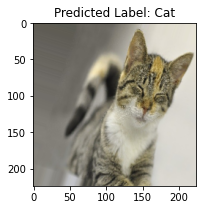

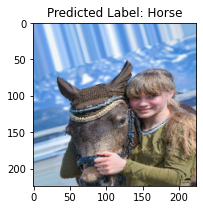

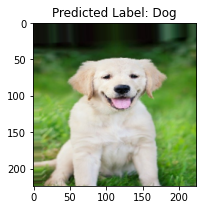

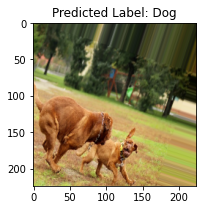

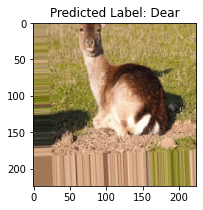

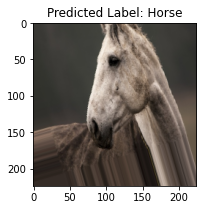

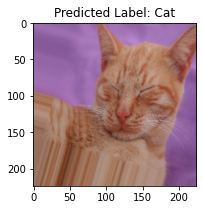

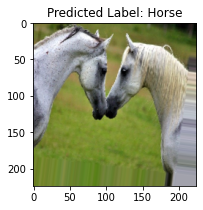

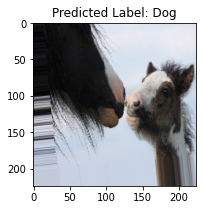

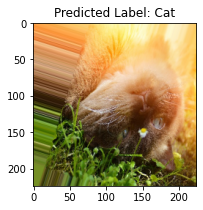

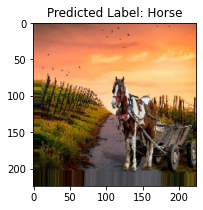

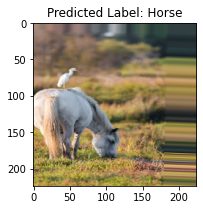

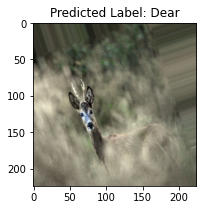

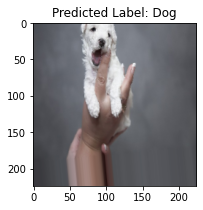

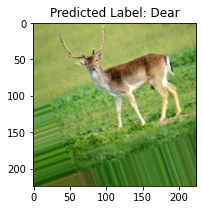

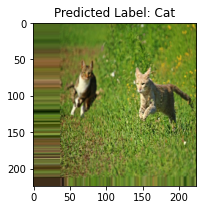

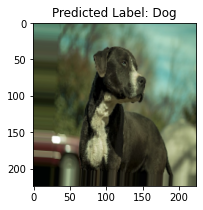

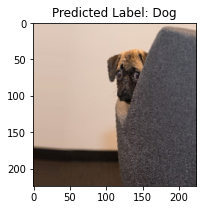

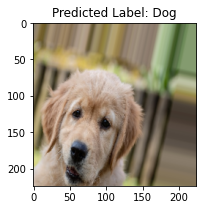

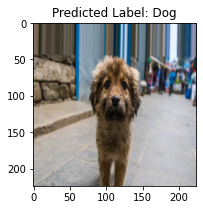

In [16]:
class_labels = ["Cat", "Dear", "Dog", "Horse"]  


for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    for i in range(min(20, len(images))):  
        plt.figure(figsize=(3, 3))
        plt.imshow(images[i])
        
        predicted_label = class_labels[predicted_labels[i]]
        
        plt.title(f"Predicted Label: {predicted_label}")
        plt.show()

    break  
